In [2]:
import numpy as np
import matplotlib
%matplotlib notebook
from matplotlib import pyplot as plt

In [3]:
network_types = ['Relu', 'Relu+dropout','Selu', 'Selu+dropout', 'Sigmoid','Sigmoid+dropout']
network_depths = [1,2,4,8,16,32,64]

In [4]:
train_acc = {}
val_acc = {}
for nt in network_types:
    train_acc[nt] = {}
    val_acc[nt] = {}
    for nd in network_depths:
        train_acc[nt][nd] = []
        val_acc[nt][nd] = []
        
        if nt in ['Relu', 'Selu+dropout']:
            nd_str = "{} layer{} ".format(nd, 's' if nd>1 else '')
        else:
            nd_str = "layer{} {}".format('s' if nd>1 else '', nd)
        filename = 'result/{}({}, 784 neu).txt'.format(nt, nd_str)
        
        with open(filename) as f:
            lines = f.readlines()
            for i, line in enumerate(lines):
                if i % 4 == 0 or i % 6 == 3:
                    continue
                pieces = line.split(' ')
                if i % 4 == 1:
                    train_acc[nt][nd].append(float(pieces[1]))
                if i % 4 == 2:
                    val_acc[nt][nd].append(float(pieces[1]))
                    

In [5]:
colors = ['red', 'green', 'blue', 'orange', 'black', 'yellow', 'purple']

<IPython.core.display.Javascript object>


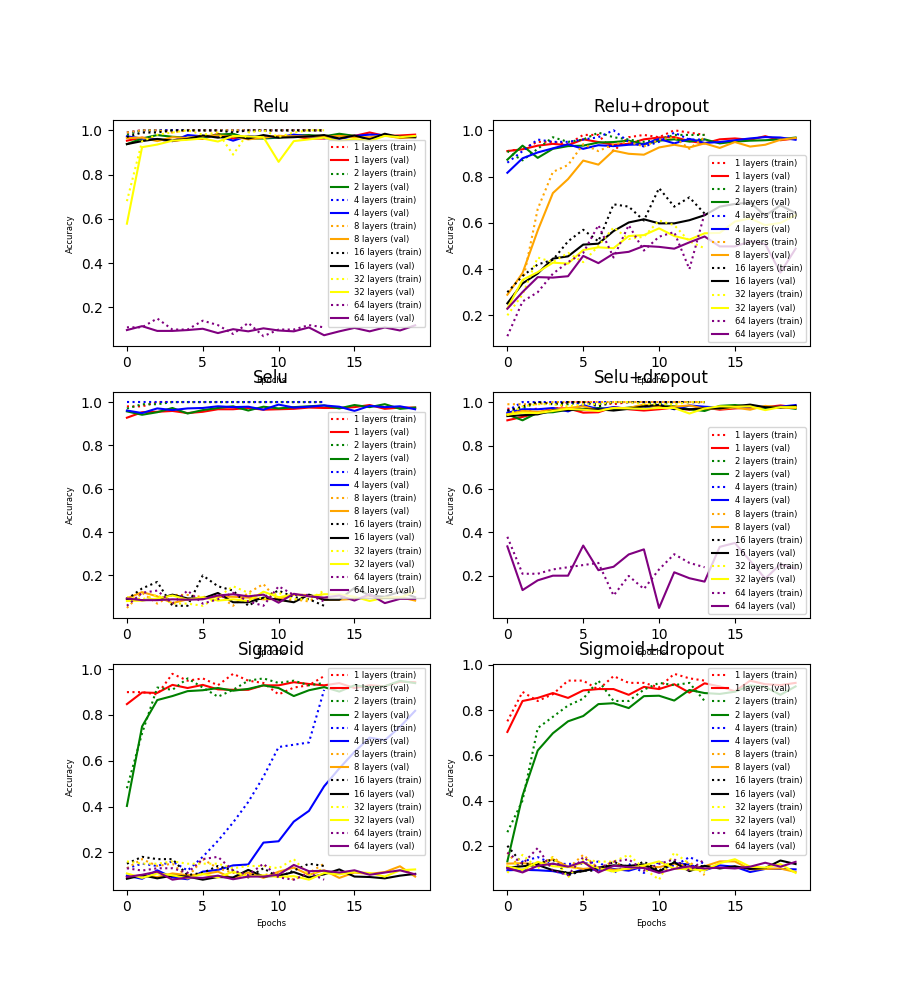

In [6]:
fig, ax = plt.subplots(3,2,figsize=(9,10))
for i, nt in enumerate(network_types):
    current_ax = ax[i//2][i%2]
    current_ax.title.set_text(nt)
    legend = []
    for j, nd in enumerate(network_depths):
        legend.append("{} layers (train)".format(nd))
        legend.append("{} layers (val)".format(nd))
        current_ax.plot(train_acc[nt][nd], linestyle='dotted', color=colors[j])
        current_ax.plot(val_acc[nt][nd], color=colors[j])
        #current_ax.set_ylim(0.9, 1)
        
    current_ax.legend(legend, fontsize=6)
    current_ax.xaxis.label.set_text('Epochs')
    current_ax.xaxis.label.set_fontsize(6)
    current_ax.yaxis.label.set_text('Accuracy')
    current_ax.yaxis.label.set_fontsize(6)